In [1]:
import numpy as np
import cv2
import glob

In [3]:
cv2.TERM_CRITERIA_EPS, cv2.TERM_CRITERIA_MAX_ITER

(2, 1)

In [36]:
criteria = (cv2.TERM_CRITERIA_EPS, cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [5]:
# objs placeholder
objp = np.zeros((7 * 6, 3), dtype=np.float32)

In [29]:
objp[:, :2] = np.mgrid[0 : 7, 0 : 6].T.reshape(-1, 2)

In [7]:
# first is x, then is y.
x1, y1 = np.meshgrid(range(5), range(3))

In [8]:
x1

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [9]:
y1

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2]])

In [18]:
y2, x2 = np.mgrid[range(3), range(5)]

In [19]:
x2, y2

(array([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]),
 array([[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2]]))

In [20]:
(x1 == x2).all(), (y1 == y2).all()

(True, True)

In [22]:
np.mgrid[0 : 7, 0 : 6].shape

(2, 7, 6)

In [23]:
np.mgrid[0 : 7, 0 : 6].T.shape

(6, 7, 2)

In [24]:
arr = np.random.random((1, 2, 3, 4, 5))

In [25]:
arr.shape

(1, 2, 3, 4, 5)

In [28]:
arr.T.shape # transpose is to reverse the order of all axises.

(5, 4, 3, 2, 1)

In [40]:
objpoints = []
imgpoints = []
import os

for i in range(1, 15):
    img_path = f"../opencv/samples/data/left{str(i).zfill(2)}.jpg"
    if not os.path.isfile(img_path):
        continue
    image = cv2.imread(img_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (7, 6), None)
    if ret:
        objpoints.append(objp)
#         corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
        imgpoints.append(corners)
#         cv2.drawChessboardCorners(img, (7, 6), corners2, ret)
#         plt.figure()
#         plt.imshow(img)


In [38]:
cv2.cornerSubPix

<function cornerSubPix>

In [43]:
len(imgpoints), imgpoints[0].shape

(11, (42, 1, 2))

In [44]:
imgpoints[0][:5]

array([[[475.46497, 264.59277]],

       [[440.46597, 263.34772]],

       [[406.10455, 261.65866]],

       [[372.7524 , 259.79944]],

       [[340.35718, 258.2445 ]]], dtype=float32)

In [67]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
    objpoints,
    imgpoints,
    gray.shape[::-1],
    None,
    None
)

# mtx: camera matrix
# dist: distortion coeff
# recs: rotation matrix
# tvecs: translation

In [46]:
ret # RMS: reprojection error

0.46151318818038595

In [48]:
mtx # camera instrinsic, focal length + center points.

array([[530.16208965,   0.        , 341.48703185],
       [  0.        , 530.21103537, 230.1026167 ],
       [  0.        ,   0.        ,   1.        ]])

In [49]:
dist

array([[-3.60235911e-01,  8.54960568e-01,  5.79023904e-04,
        -4.97447300e-04, -2.16443391e+00]])

In [50]:
len(dist)

1

In [51]:
dist.shape

(1, 5)

In [53]:
rvecs # for every image, the rotation vector is different

[array([[-0.43111286],
        [ 0.24637878],
        [-3.0899577 ]]),
 array([[ 0.40684668],
        [ 0.65086406],
        [-1.33942877]]),
 array([[-0.2655013 ],
        [-0.39713196],
        [-2.74741859]]),
 array([[-0.37910801],
        [-0.18649445],
        [-3.11622913]]),
 array([[-0.46356255],
        [-0.31650383],
        [-1.76127525]]),
 array([[-0.30062338],
        [ 0.38721945],
        [-1.43703348]]),
 array([[-0.32501996],
        [ 0.15585019],
        [-1.24252253]]),
 array([[-0.46178863],
        [-0.09251721],
        [-1.33534158]]),
 array([[-0.35600739],
        [-0.2457961 ],
        [-1.56871448]]),
 array([[ 0.30135469],
        [ 0.50090106],
        [-1.82904257]]),
 array([[-0.1760248 ],
        [-0.4634321 ],
        [ 1.34874928]])]

In [55]:
len(rvecs)

11

In [56]:
rvecs[0]

array([[-0.43111286],
       [ 0.24637878],
       [-3.0899577 ]])

In [57]:
rvecs[0].shape

(3, 1)

In [58]:
tvecs

[array([[ 3.79991132],
        [ 0.97840882],
        [14.72776259]]),
 array([[-2.1218105 ],
        [ 1.9215297 ],
        [12.71961569]]),
 array([[3.03741638],
        [2.80468365],
        [9.79873563]]),
 array([[ 2.82475558],
        [ 2.28445439],
        [10.84313126]]),
 array([[-1.13934079],
        [ 2.730564  ],
        [ 9.4945805 ]]),
 array([[ 1.60241512],
        [ 3.90183921],
        [15.94685828]]),
 array([[-5.93970568],
        [ 2.48851388],
        [16.62564074]]),
 array([[-3.2785915 ],
        [ 2.22148866],
        [11.61731168]]),
 array([[-2.89840277],
        [ 2.68052432],
        [10.47735382]]),
 array([[-1.22043788],
        [ 3.60621633],
        [15.54610106]]),
 array([[ 1.82053434],
        [-4.19578301],
        [12.37787207]])]

In [59]:
len(tvecs), tvecs[0]

(11,
 array([[ 3.79991132],
        [ 0.97840882],
        [14.72776259]]))

In [60]:
img12 = cv2.imread(f"../opencv/samples/data/left{str(12).zfill(2)}.jpg")
h, w = img12.shape[:2]
new_mtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1, (w, h))

In [61]:
new_mtx

array([[336.53045654,   0.        , 284.73301429],
       [  0.        , 283.49624634, 148.70191251],
       [  0.        ,   0.        ,   1.        ]])

In [62]:
# use opencv to do undistortion for images
# use cv2.undistort()
dist = cv2.undistort(img12, mtx, dist, None, new_mtx)

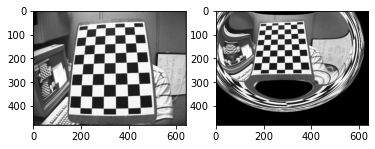

In [64]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.imshow(img12)
plt.subplot(1, 2, 2)
plt.imshow(dist)

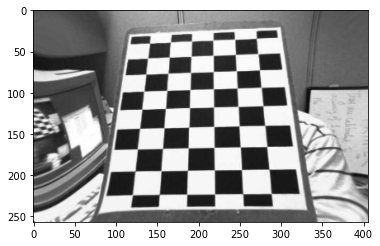

In [65]:
x, y, w, h = roi
crop = dist[y : y + h, x : x + w]
plt.figure()
plt.imshow(crop)

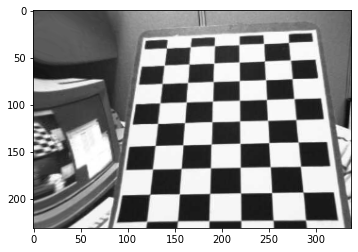

In [69]:
# use remapping
mapx, mapy = cv2.initUndistortRectifyMap(mtx, dist, None, new_mtx, (w, h), 5)
img = cv2.remap(img12, mapx, mapy, cv2.INTER_LINEAR)
plt.figure()
plt.imshow(img[y : y + h, x : x + w])

In [72]:
# reproject error to measure how good the parameters

error = 0
for i in range(len(objpoints)):
    img_pts, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
#     print(img_pts.dtype)
#     print(imgpoints[i].dtype)
    error += cv2.norm(imgpoints[i], img_pts, cv2.NORM_L2) / len(img_pts)
    
print("total error: ", error / len(objpoints))

float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
total error:  0.06216242674232892


In [ ]:
#